# Milestone 2 

Due to the reiqurement of this project being regression, after confirming with Proffesor Islam, I have changed my dataset from the Neartest earth objects (which I used in milestone 1) to Car price data which will be used in this milestone.

## Data Preprocessing

In [1]:
import pandas as pd

#reading Data
path = 'CarPrice_Assignment.csv'
Dataset = pd.read_csv(filepath_or_buffer=path)

#creates a sample of 100 
df = Dataset.sample(100)

#one-hotEncoding
Dataset = pd.get_dummies(Dataset, columns=['aspiration'])

Dataset.head()


,car_ID,symboling,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_std,aspiration_turbo
0,1,3,alfa-romero giulia,gas,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,True,False
1,2,3,alfa-romero stelvio,gas,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,True,False
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,True,False
3,4,2,audi 100 ls,gas,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,True,False
4,5,2,audi 100ls,gas,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,True,False


### Correlation 

This is a heatmap used to find the correlation for all numeric values, Looking at the map it seems that Curb Wieght, engine size, and horsepower are the value that most correlate with the price of the car

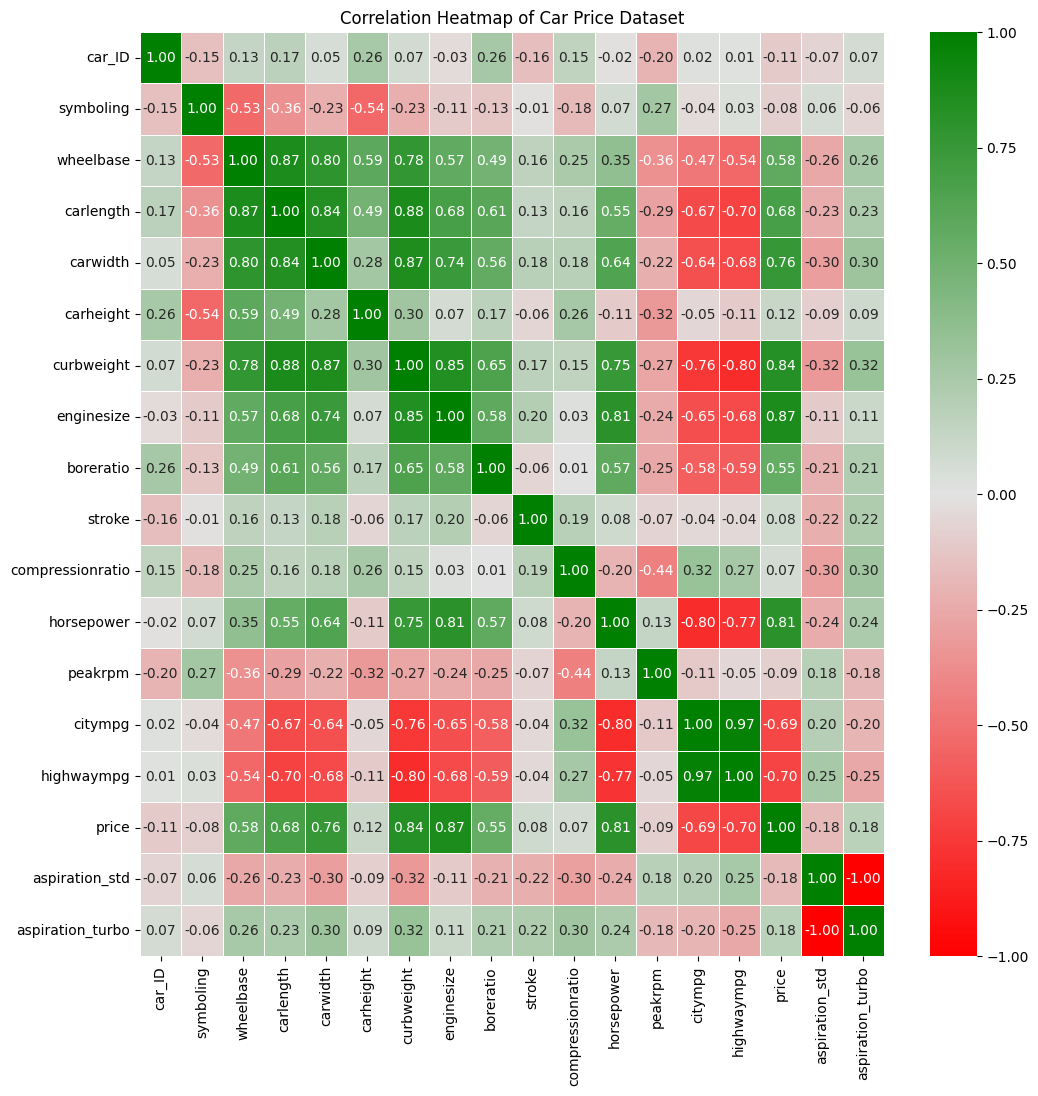

In [2]:
#Correlation
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Define custom colors for the colormap
colors = ["red", "#e2e2e2", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_rg", colors)

# Calculate the correlation matrix
corr = Dataset.corr(numeric_only=True)

# Create a heatmap using the custom colormap and setting color range
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Car Price Dataset')
plt.show()

### NaN values
check if there are any null values

In [3]:
Dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
aspiration_std      0
aspiration_turbo    0
dtype: int64

# Training model

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Select features and target variable
X = Dataset[['aspiration_std', 'aspiration_turbo', 'enginesize', 'horsepower', 'curbweight']]
y = Dataset['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create list of models
modelList = []
modelList.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LinearRegression())]))))
modelList.append(('scaledKNR' , (Pipeline([('scaled' , StandardScaler()),('KNR' ,KNeighborsRegressor(n_neighbors=14))]))))
modelList.append(('scaledRFR' , (Pipeline([('scaled' , StandardScaler()),('RFR' ,RandomForestRegressor(n_estimators=10))]))))
modelList.append(('scaledDTR  ' , (Pipeline([('scaled' , StandardScaler()),('DTR' ,DecisionTreeRegressor())]))))

scores = []
r2Score = []
MAE = []
MSE = []
RMSE = []
for pipe, model in modelList:
    #fits models and makes predictions
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    scores.append(prediction.round())

    #calculates evluation metrics 
    r2Score.append(r2_score(y_pred=prediction, y_true=y_test))
    MAE.append(mean_absolute_error(y_pred=prediction, y_true=y_test))
    MSE.append(mean_squared_error(y_pred=prediction, y_true=y_test))
    RMSE.append(root_mean_squared_error(y_pred=prediction, y_true=y_test))


accuracyDataframe = pd.DataFrame({"Linear":scores[0], 'Kneighbors':scores[1],'RandomForest':scores[2], 'DecisionTree':scores[3]}, index=X_test.index)

finaldf = accuracyDataframe.join(X_test).join(y_test.round())
finaldf['error'] = finaldf['RandomForest'] - finaldf['price']
display(finaldf)



,Linear,Kneighbors,RandomForest,DecisionTree,aspiration_std,aspiration_turbo,enginesize,horsepower,curbweight,price,error
15,26267.0,24085.0,34239.0,36880.0,True,False,209,182,3230,30760.0,3479.0
9,19059.0,17793.0,18251.0,19045.0,False,True,131,160,3053,17859.0,392.0
100,11168.0,11096.0,9158.0,8845.0,True,False,120,97,2302,9549.0,-391.0
132,13496.0,13276.0,12362.0,12170.0,True,False,121,110,2658,11850.0,512.0
68,23779.0,18810.0,28616.0,31600.0,False,True,183,123,3750,28248.0,368.0
95,6817.0,6981.0,7322.0,7349.0,True,False,97,69,2028,7799.0,-477.0
159,7983.0,7718.0,7928.0,7898.0,True,False,110,56,2275,7788.0,140.0
162,7416.0,7187.0,7958.0,8358.0,True,False,98,70,2140,9258.0,-1300.0
147,10787.0,11465.0,12554.0,12290.0,True,False,108,94,2455,10198.0,2356.0
182,6836.0,7158.0,7947.0,7995.0,True,False,97,52,2261,7775.0,172.0


# Accuracy analysis

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
linear,0.816034,2755.592455,1.452302e+07,3810.907649
Kneighbors,0.726612,2995.339439,2.158235e+07,4645.680546
RandomForest,0.946676,1399.100724,4.209602e+06,2051.731511
DecisionTree,0.910436,1908.130073,7.070509e+06,2659.042949


<BarContainer object of 4 artists>

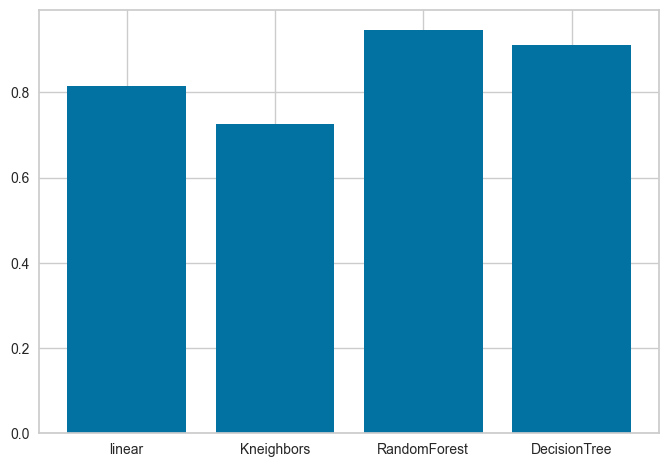

In [100]:
import matplotlib.pyplot as plt

#Create dataframe for accuracy measurement
Accuracy = pd.DataFrame(r2Score, ['linear', 'Kneighbors', 'RandomForest', 'DecisionTree' ], ['r2_score'])

Accuracy['mean_absolute_error'] = MAE
Accuracy['mean_squared_error'] = MSE
Accuracy['root_mean_squared_error'] = RMSE

display(Accuracy)

plt.bar(Accuracy.index, Accuracy['r2_score'])



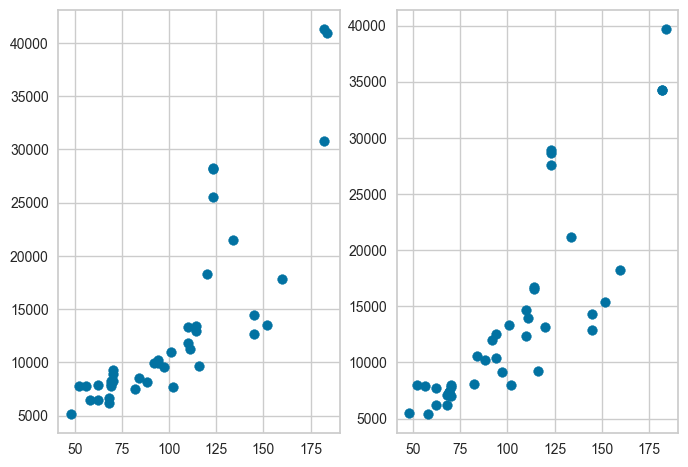

In [80]:


fig, axes = plt.subplots(nrows=1, ncols=2) #creates a 2x2 figure
axes[0].scatter(finaldf['horsepower'], finaldf['price'])
axes[1].scatter(finaldf['horsepower'], finaldf['RandomForest'])



### Finding K values for K means

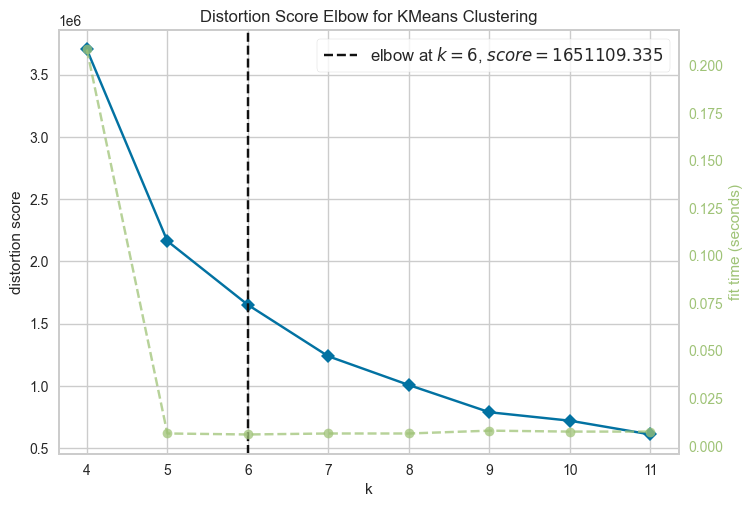

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X_train)
visualizer.show()

In [18]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

display(model.predict(X_test))


array([35910.785     , 18688.94      ,  9623.16      , 12954.89833333,
       26344.34      ,  7269.17      ,  7932.86      ,  7760.6       ,
       12658.205     ,  7949.97      , 13824.735     ,  7926.19      ,
       13037.3275    , 10795.455     , 39818.77      ,  6564.7825    ,
        5539.54083333, 14066.43      ,  9748.145     , 10715.32      ,
       10248.66666667, 14683.5       ,  7227.98      ,  5583.16083333,
        7029.469     , 35881.905     ,  9670.68166667, 17145.63      ,
        7002.77      , 16290.15      , 26676.75      ,  6576.90783333,
        7910.44      , 18671.92      ,  8020.24      , 26676.75      ,
       14097.4975    , 12628.355     ,  6914.58783333, 14810.6       ,
        8480.70083333])